# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ori_datas=pd.read_csv("titanic_train.csv")
ori_datas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 内容整齐度

无结构性问题

## 内容干净度

In [3]:
cleaned_datas=ori_datas.copy()
cleaned_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId类型错误，Survived，Pclass，Sex以及Embarked应为分类数据，Age、Cabin和Embark存在空缺值

In [4]:
cleaned_datas["PassengerId"]=cleaned_datas["PassengerId"].astype(str)
cleaned_datas["Survived"]=cleaned_datas["Survived"].astype("category")
cleaned_datas["Pclass"]=cleaned_datas["Pclass"].astype("category")
cleaned_datas["Sex"]=cleaned_datas["Sex"].astype("category")
cleaned_datas["Embarked"]=cleaned_datas["Embarked"].astype("category")

In [5]:
cleaned_datas[cleaned_datas["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


其他数据都完好，故可以保留年龄为空的数据，为了之后的运算，需给年龄填充值，这里给缺失值填充年龄的平均值

In [8]:
age_mean0=cleaned_datas["Age"].mean()
cleaned_datas["Age"]=cleaned_datas["Age"].fillna(age_mean0)
cleaned_datas["Age"].isnull().sum()

np.int64(0)

In [9]:
cleaned_datas[cleaned_datas["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


由于大多数数据存在空缺值，故船舱号缺失行不能删去

In [10]:
cleaned_datas[cleaned_datas["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


由于其他数据仍保留，且登船港口并不被认为是影响生还率的关键因素，故没必要删去

### 重复数据

In [12]:
cleaned_datas.duplicated().sum()

np.int64(0)

无重复数据

### 不一致数据

In [14]:
cleaned_datas["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
cleaned_datas["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
cleaned_datas["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [17]:
cleaned_datas["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

无不一致数据

### 无效数据

In [18]:
cleaned_datas.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


数据正常

## 数据整理

#### 同乘伴侣/同胞数量和同乘父母/孩子数量可以合并为同乘家庭数量

In [20]:
cleaned_datas["Family"]=cleaned_datas["SibSp"]+cleaned_datas["Parch"]
cleaned_datas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


## 数据探索

In [21]:
sns.set_palette("Paired")

In [22]:
plt.rcParams["figure.figsize"]=[7,3.5]
plt.rcParams["figure.autolayout"]=True

### 幸存者分布

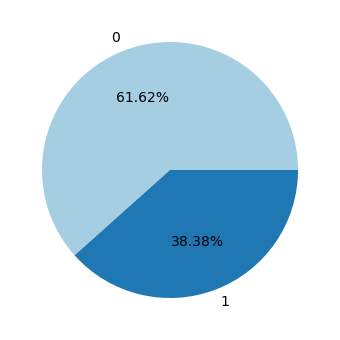

In [34]:
survived_value_counts=cleaned_datas["Survived"].value_counts()
survived_value_counts_index=survived_value_counts.index
plt.pie(survived_value_counts,labels=survived_value_counts_index,autopct="%.2f%%")
plt.show()

遇难者多于幸存者

### 年龄分布

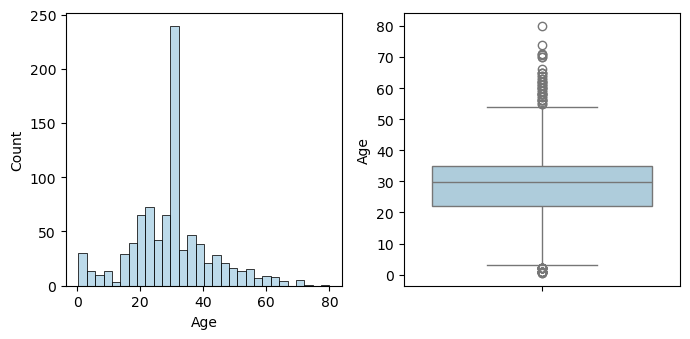

In [35]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_datas,x="Age",ax=axes[0])
sns.boxplot(cleaned_datas,y="Age",ax=axes[1])
plt.show()

有较多老年人和婴儿，但总体集中在年轻群体

### 年龄和幸存者分布关系

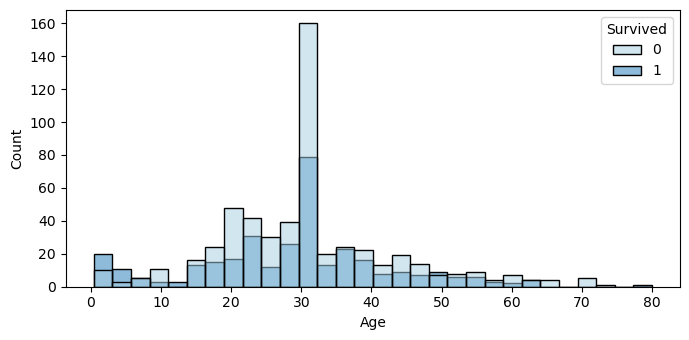

In [36]:
sns.histplot(cleaned_datas,x="Age",hue="Survived")
plt.show()

只有婴儿群体幸存率较高

### 票价分布

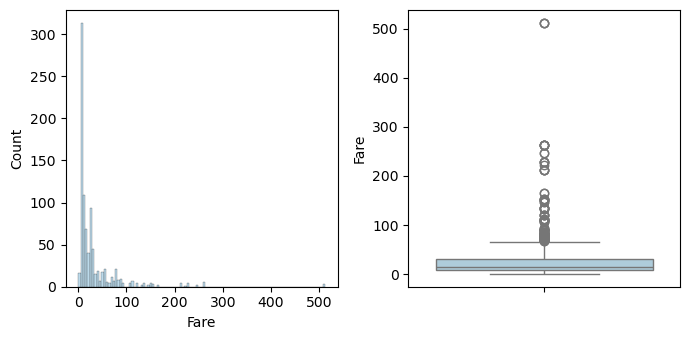

In [37]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_datas,x="Fare",ax=axes[0])
sns.boxplot(cleaned_datas,y="Fare",ax=axes[1])
plt.show()

呈严重右偏态，高价位极端值较多，但大多集中于0到100的低价位

### 票价及幸存分布

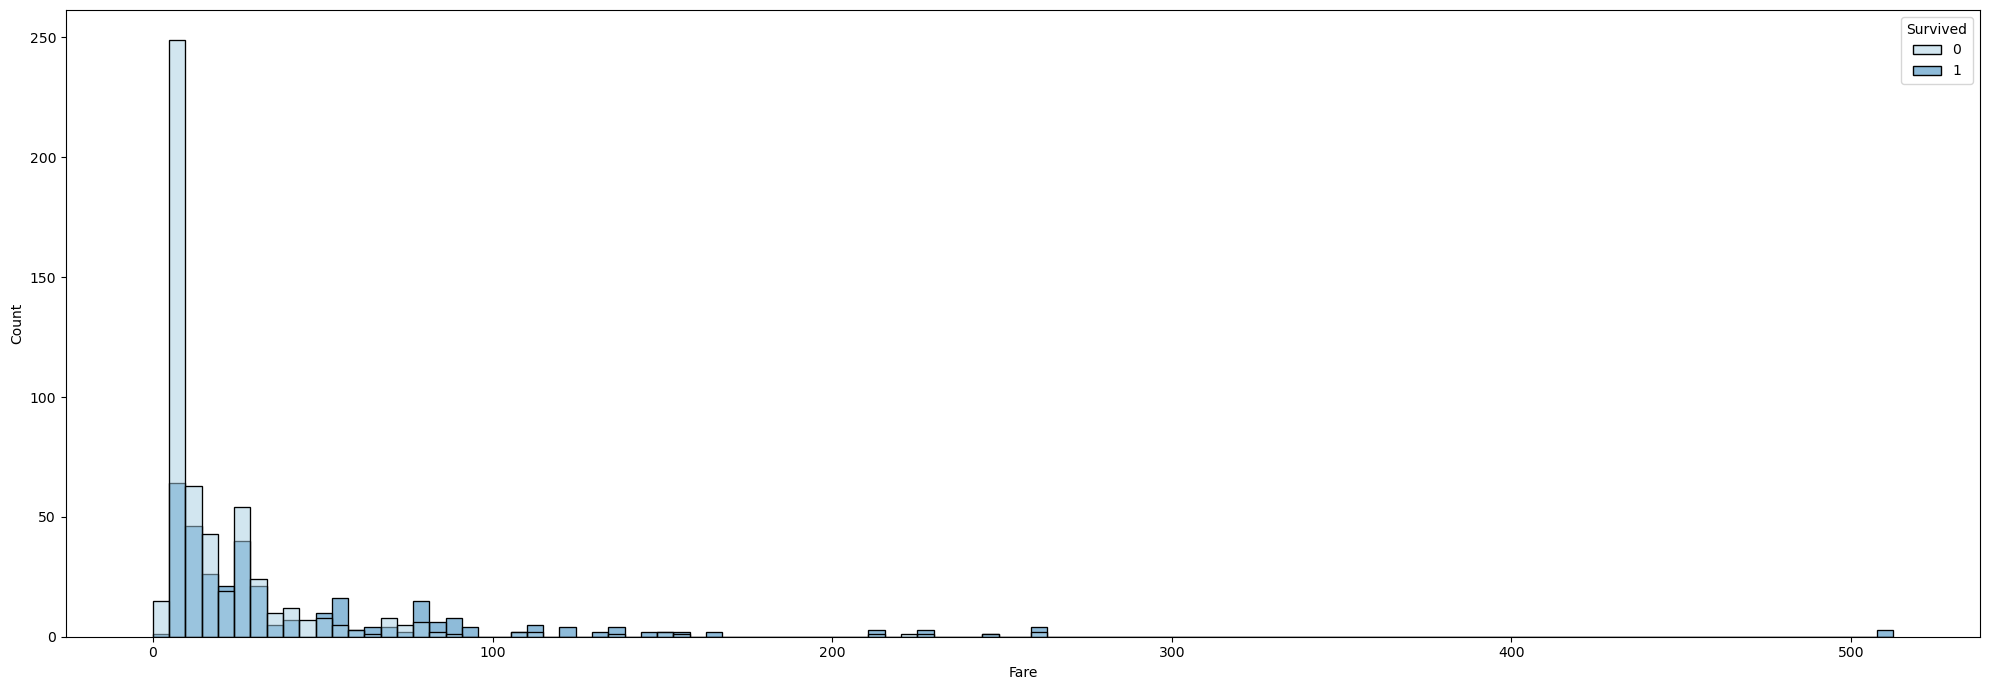

In [38]:
plt.subplots(1,1,figsize=[20,7])
sns.histplot(cleaned_datas,x="Fare",hue="Survived")
plt.show()

低票价幸存率较低

### 船舱等级及幸存分布

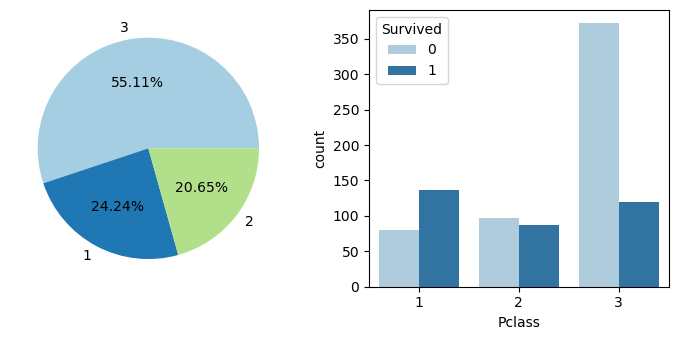

In [41]:
figure,axes=plt.subplots(1,2)
axes[0].pie(cleaned_datas["Pclass"].value_counts(),labels=cleaned_datas["Pclass"].value_counts().index,autopct="%.2f%%")
sns.countplot(cleaned_datas,x="Pclass",hue="Survived",ax=axes[1])
plt.show()

三级船舱人数最多，幸存率最低

### 性别与幸存分布

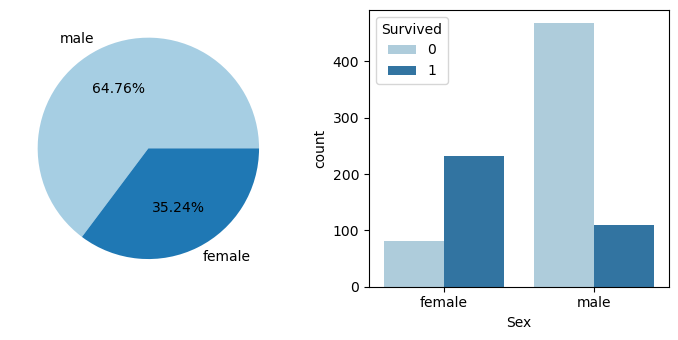

In [42]:
figure,axes=plt.subplots(1,2)
axes[0].pie(cleaned_datas["Sex"].value_counts(),labels=cleaned_datas["Sex"].value_counts().index,autopct="%.2f%%")
sns.countplot(cleaned_datas,x="Sex",hue="Survived",ax=axes[1])
plt.show()

男性登船数较多，但存活率远低于女性

### 家庭成员与幸存分布

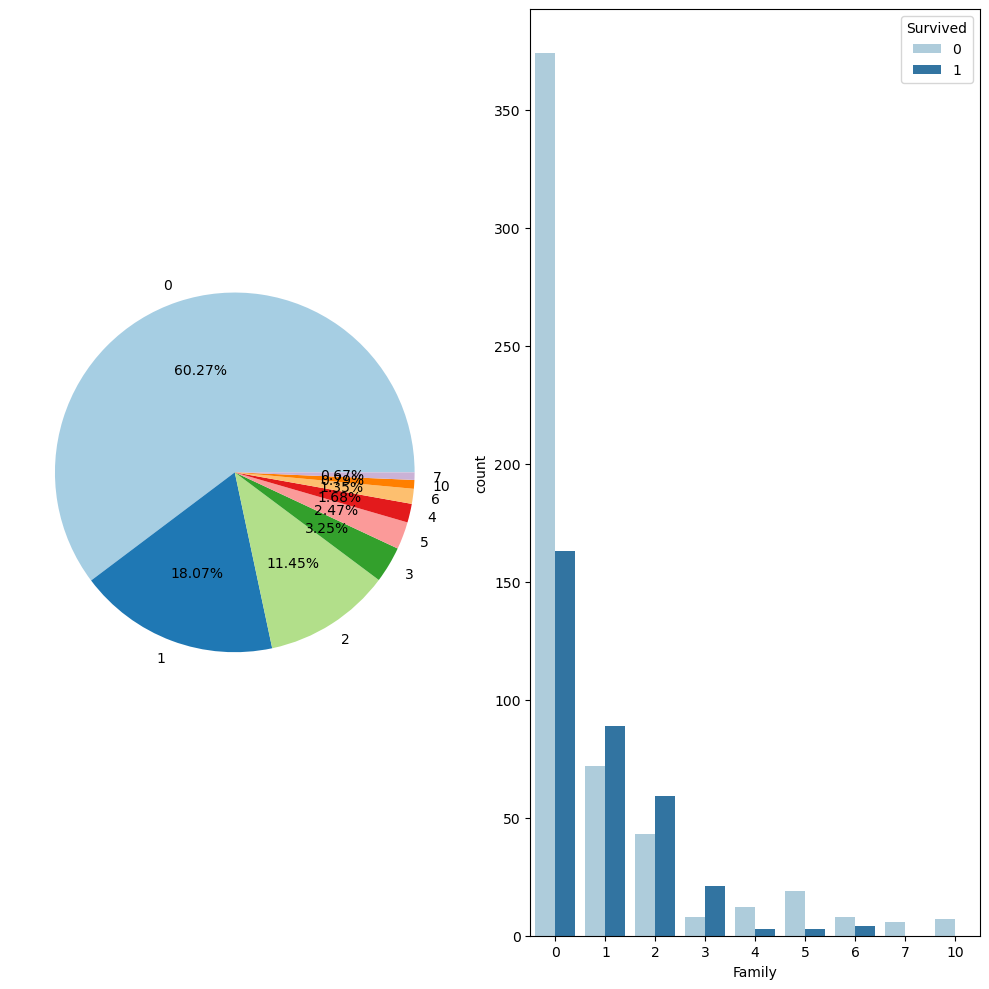

In [45]:
figure,axes=plt.subplots(1,2,figsize=[10,10])
axes[0].pie(cleaned_datas["Family"].value_counts(),labels=cleaned_datas["Family"].value_counts().index,autopct="%.2f%%")
sns.countplot(cleaned_datas,x="Family",hue="Survived",ax=axes[1])
plt.show()

家庭成员在1~3的家庭存活率最高

### 登船港口和幸存分布情况

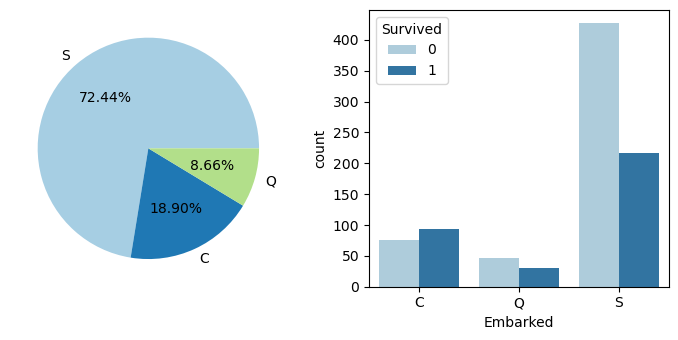

In [46]:
figure,axes=plt.subplots(1,2)
axes[0].pie(cleaned_datas["Embarked"].value_counts(),labels=cleaned_datas["Embarked"].value_counts().index,autopct="%.2f%%")
sns.countplot(cleaned_datas,x="Embarked",hue="Survived",ax=axes[1])
plt.show()

S港口登船数最多，但幸存率最低，C港口幸存率最高

In [47]:
cleaned_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
 12  Family       891 non-null    int64   
dtypes: category(4), float64(2), int64(3), object(4)
memory usage: 66.8+ KB


## 数据分析

In [48]:
import statsmodels.api as sm

In [66]:
lr_datas=cleaned_datas.copy()

In [67]:
lr_datas=lr_datas.drop(["PassengerId","Ticket","Cabin","Name"],axis=1)

In [68]:
lr_datas

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,1
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,1
4,0,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,3
889,1,1,male,26.000000,0,0,30.0000,C,0


In [69]:
lr_datas=pd.get_dummies(lr_datas,dtype=int,drop_first=True,columns=["Pclass","Sex","Embarked"])
lr_datas

,Survived,Age,SibSp,Parch,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,1,0,1,1,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,0,1
4,0,35.000000,0,0,8.0500,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,0,0,0,1
888,0,29.699118,1,2,23.4500,3,0,1,0,0,1
889,1,26.000000,0,0,30.0000,0,0,0,1,0,0


In [71]:
y=lr_datas["Survived"]
x=lr_datas.drop("Survived",axis=1)

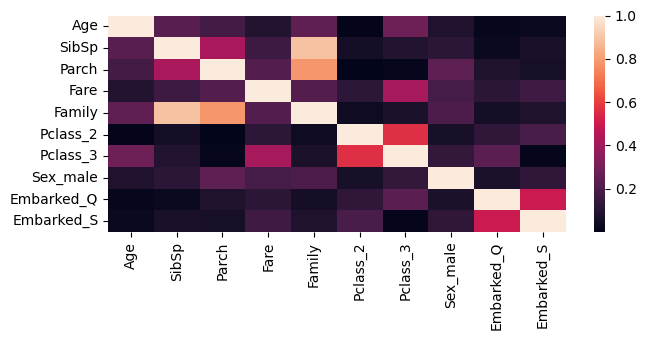

In [76]:
sns.heatmap(x.corr().abs())
plt.show()

可以看出，Family和parch以及sibsp相关性较高，保留Family

In [78]:
x=x.drop(["Parch","SibSp"],axis=1)

In [80]:
x=sm.add_constant(x)
x

,const,Age,Fare,Family,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1.0,22.000000,7.2500,1,0,1,1,0,1
1,1.0,38.000000,71.2833,1,0,0,0,0,0
2,1.0,26.000000,7.9250,0,0,1,0,0,1
3,1.0,35.000000,53.1000,1,0,0,0,0,1
4,1.0,35.000000,8.0500,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,1.0,27.000000,13.0000,0,1,0,1,0,1
887,1.0,19.000000,30.0000,0,0,0,0,0,1
888,1.0,29.699118,23.4500,3,0,1,0,0,1
889,1.0,26.000000,30.0000,0,0,0,1,0,0


In [81]:
model=sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.440917
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Sat, 04 Oct 2025   Pseudo R-squ.:                  0.3379
Time:                        14:03:18   Log-Likelihood:                -392.86
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.179e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0970      0.476      8.606      0.000       3.164       5.030
Age           -0.0385      0.008     -4.903      0.000      -0.054      -0.023
Fare           0.0025      0.002      0.994      0.320      -0.002       0.007
Family        -0.2211      0.068     -3.230      0.001      -0.355      -0.087
Pclass_2      -0.9031      0.297     -3.043      0.002      -1.485      -0.321
Pclass_3      -2.1336      0.297     -7.178      0.000      -2.716      -1.551
Sex_male      -2.7335      0.200    -13.647      0.000      -3.126      -2.341
Embarked_Q    -0.0680      0.380     -0.179      0.858      -0.813       0.677
Embarked_S    -0.4684      0.239     -1.960      0.050      -0.937      -0.000
==============================================================================
"""

设显著区间为0.05，则Embarked_Q，Embarked_S，Fare对数据无显著影响

In [82]:
x=x.drop(["Embarked_Q","Fare","Embarked_S"],axis=1)
model=sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sat, 04 Oct 2025   Pseudo R-squ.:                  0.3323
Time:                        14:09:03   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
Family        -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

In [85]:
np.exp(-0.0395)

np.float64(0.9612699539905982)

说明每增长一岁，生还率下降百分之四

In [86]:
np.exp(-0.2186)

np.float64(0.803643111115195)

说明家庭成员每增加一个，生还率下降百分之20

In [88]:
np.exp(-1.1798)

np.float64(0.30734020049483596)

二等舱的生还概率是一等舱的三分之一

In [89]:
np.exp(-2.3458)

np.float64(0.09577055503172162)

三等舱的生还概率是一等舱的十分之一

In [91]:
np.exp(-2.7854)

np.float64(0.061704402333015156)

男性的生还概率是女性的百分之六

## 预测测试集

In [123]:
titanic_test=pd.read_csv("titanic_test.csv")
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [124]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [125]:
titanic_test["Age"]=titanic_test["Age"].fillna(titanic_test["Age"].mean())
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [126]:
titanic_test["Family"]=titanic_test["SibSp"]+titanic_test["Parch"]

In [127]:
titanic_test["Pclass"]=pd.Categorical(titanic_test["Pclass"],categories=['1','2','3'])
titanic_test["Sex"]=pd.Categorical(titanic_test["Sex"],categories=['male','female'])
titanic_test["Embarked"]=pd.Categorical(titanic_test["Embarked"],categories=['Q','S','C'])

In [128]:
titanic_test=pd.get_dummies(titanic_test,columns=["Pclass"],drop_first=True,dtype=int)
titanic_test

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,0,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,1,0,0
2,894,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,0,0,0
3,895,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,0,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,0,0,0
414,1306,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,0,0,0
415,1307,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,0
416,1308,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,0,0,0


In [129]:
titanic_test=pd.get_dummies(titanic_test,columns=["Sex"],dtype=int)
titanic_test

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Pclass_2,Pclass_3,Sex_male,Sex_female
0,892,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,Q,0,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,S,1,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,Q,0,0,0,1,0
3,895,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,S,0,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,S,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,NaN,S,0,0,0,1,0
414,1306,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,C105,C,0,0,0,0,1
415,1307,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,0,1,0
416,1308,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,NaN,S,0,0,0,1,0


In [130]:
model.params

const       4.061982
Age        -0.039495
Family     -0.218627
Pclass_2   -1.179763
Pclass_3   -2.345823
Sex_male   -2.785398
dtype: float64

In [131]:
x_test=titanic_test[["Age","Family","Pclass_2","Pclass_3","Sex_male"]]
x_test

,Age,Family,Pclass_2,Pclass_3,Sex_male
0,34.50000,0,0,0,1
1,47.00000,1,0,0,0
2,62.00000,0,0,0,1
3,27.00000,0,0,0,1
4,22.00000,2,0,0,0
...,...,...,...,...,...
413,30.27259,0,0,0,1
414,39.00000,0,0,0,0
415,38.50000,0,0,0,1
416,30.27259,0,0,0,1


In [132]:
x_test=sm.add_constant(x_test)

In [133]:
predict_survive=model.predict(x_test)
predict_survive

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

In [134]:
predict_survive>0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool

In [140]:
predict_passengers=pd.concat([pd.read_csv("titanic_test.csv")["Name"],predict_survive],axis=1)

In [141]:
predict_passengers

,Name,0
0,"Kelly, Mr. James",0.478514
1,"Wilkes, Mrs. James (Ellen Needs)",0.879434
2,"Myles, Mr. Thomas Francis",0.236473
3,"Wirz, Mr. Albert",0.552361
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.940242
...,...,...
413,"Spector, Mr. Woolf",0.520230
414,"Oliva y Ocana, Dona. Fermina",0.925647
415,"Saether, Mr. Simon Sivertsen",0.439306
416,"Ware, Mr. Frederick",0.520230


In [147]:
predict_passengers.rename(columns={0:'Survived'},inplace=True)

In [148]:
predict_passengers

,Name,Survived
0,"Kelly, Mr. James",0.478514
1,"Wilkes, Mrs. James (Ellen Needs)",0.879434
2,"Myles, Mr. Thomas Francis",0.236473
3,"Wirz, Mr. Albert",0.552361
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.940242
...,...,...
413,"Spector, Mr. Woolf",0.520230
414,"Oliva y Ocana, Dona. Fermina",0.925647
415,"Saether, Mr. Simon Sivertsen",0.439306
416,"Ware, Mr. Frederick",0.520230


In [151]:
predict_passengers.to_csv("predict_passengers.csv",index=False)

In [152]:
pd.read_csv("predict_passengers.csv")

,Name,Survived
0,"Kelly, Mr. James",0.478514
1,"Wilkes, Mrs. James (Ellen Needs)",0.879434
2,"Myles, Mr. Thomas Francis",0.236473
3,"Wirz, Mr. Albert",0.552361
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.940242
...,...,...
413,"Spector, Mr. Woolf",0.520230
414,"Oliva y Ocana, Dona. Fermina",0.925647
415,"Saether, Mr. Simon Sivertsen",0.439306
416,"Ware, Mr. Frederick",0.520230
